<a href="https://colab.research.google.com/github/lijin-durairaj-code-mode/deep-learning/blob/main/ensemble_technique_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#basic import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn
from sklearn.datasets import load_digits, make_classification, make_gaussian_quantiles
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier

#config
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [ ]:
digits=load_digits()
x=digits.data
y=digits.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
mdl1=DecisionTreeClassifier()
mdl2=LogisticRegression(max_iter=10000)
mdl3=SVC()

In [ ]:
# voting_classifier=VotingClassifier(estimators=[
#                                                ('mdl1',mdl1),
#                                                #('mdl2',mdl2),
#                                                ('mdl3',mdl3)
# ])
# voting_classifier.fit_transform(x_train,y_train)
mdl2.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
f1_score(y_test,mdl2.predict(x_test),average='micro')

0.9733333333333334

In [ ]:
bagging_classifier=BaggingClassifier(base_estimator=LogisticRegression(),random_state=42,max_features=10,max_samples=30,n_jobs=-1)
bagging_classifier.fit(x_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), max_features=10,
                  max_samples=30, n_jobs=-1, random_state=42)

In [ ]:
# f1_score(y_test,voting_classifier.predict(x_test),average='micro')

f1_score(y_test,bagging_classifier.predict(x_test),average='micro')

0.82

In [ ]:
classification_dummy_data=make_classification()
rnd_frst_mdl=RandomForestClassifier()
x=classification_dummy_data[0]
y=classification_dummy_data[1]

In [ ]:
rnd_frst_mdl.fit(x,y)

RandomForestClassifier()

In [ ]:
rnd_frst_mdl.feature_importances_

array([0.01194158, 0.03812806, 0.0109884 , 0.00998894, 0.02086303,
       0.00663116, 0.01639742, 0.26490015, 0.01370655, 0.01289377,
       0.01220112, 0.01388926, 0.01093237, 0.02693668, 0.01488986,
       0.00969301, 0.35588203, 0.01763367, 0.11472979, 0.01677315])

In [ ]:
# temp_data=pd.DataFrame({
#     'weather':['sunny','cloudy','sunny','cloudy','rainy','rainy','rainy','sunny','cloudy','rainy'],
# 'temperature':['hot','hot','mild','mild','mild','cool','mild','hot','hot','mild'],
# 'humidity':['high','high','normal','high','high','normal','high','high','normal','high'],
# 'wind':['weak','weak','strong','strong','strong','strong','weak','strong','weak','strong'],
# 'play':['no','yes','yes','yes','no','no','yes','no','yes','no']
# })
# x=temp_data.drop(['play'],axis=1)
# encoding=OneHotEncoder()
# transformed_x=encoding.fit_transform(x)
# y=temp_data['play']
# ada_boost=DecisionTreeClassifier(max_depth=1)
# ada_boost.fit(transformed_x,y)
# plot_tree(ada_boost,filled=True,proportion=True)

# **boosting techniques**

In [ ]:
df=pd.DataFrame()
df['x1']=[1,2,3,4,5,6,6,7,9,9]
df['x2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]
df['weights']=1/df.shape[0]
x=df.drop(['label','weights'],axis=1)
y=df['label']

In [ ]:
decision_tree=DecisionTreeClassifier(max_depth=1)
decision_tree.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

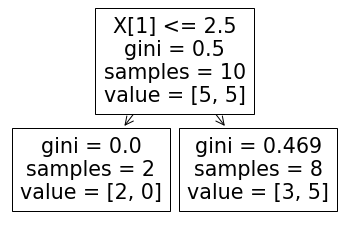

In [ ]:
plot_tree(decision_tree)

In [ ]:
df['pred01']=decision_tree.predict(x)
df

,x1,x2,label,weights,pred01
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [ ]:
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/error)

def update_row_weights(row,alpha):
  if row['label']==row['pred01']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)




In [ ]:

#calculate_model_weight(0.8)
for _r in np.arange(0.1,1,step=.1):
  print('weight {0} alpha value {1}'.format(_r,calculate_model_weight(_r)))

weight 0.1 alpha value 1.0986122886681098
weight 0.2 alpha value 0.6931471805599453
weight 0.30000000000000004 alpha value 0.4236489301936017
weight 0.4 alpha value 0.2027325540540821
weight 0.5 alpha value 0.0
weight 0.6 alpha value -0.20273255405408214
weight 0.7000000000000001 alpha value -0.42364893019360195
weight 0.8 alpha value -0.6931471805599454
weight 0.9 alpha value -1.0986122886681098


In [ ]:
df

,x1,x2,label,weights,pred01
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [ ]:
df['weights01']=df.apply(lambda x:update_row_weights(x,calculate_model_weight(0.3)),axis=1)

In [ ]:
df

,x1,x2,label,weights,pred01,weights01
0,1,5,1,0.1,1,0.065465
1,2,3,1,0.1,1,0.065465
2,3,6,0,0.1,0,0.065465
3,4,8,1,0.1,0,0.152753
4,5,1,0,0.1,0,0.065465
5,6,9,1,0.1,0,0.152753
6,6,5,0,0.1,0,0.065465
7,7,8,1,0.1,0,0.152753
8,9,9,0,0.1,0,0.065465
9,9,2,0,0.1,0,0.065465


In [ ]:
df['weights01'][0]/0.91

0.07193996381406342

In [ ]:
df['weights01'].sum()

0.9165151389911682

In [ ]:
df['normalized_weights01']=df['weights01']/df['weights01'].sum()


In [ ]:
df

,x1,x2,label,weights,pred01,weights01,normalized_weights01
0,1,5,1,0.1,1,0.065465,0.071429
1,2,3,1,0.1,1,0.065465,0.071429
2,3,6,0,0.1,0,0.065465,0.071429
3,4,8,1,0.1,0,0.152753,0.166667
4,5,1,0,0.1,0,0.065465,0.071429
5,6,9,1,0.1,0,0.152753,0.166667
6,6,5,0,0.1,0,0.065465,0.071429
7,7,8,1,0.1,0,0.152753,0.166667
8,9,9,0,0.1,0,0.065465,0.071429
9,9,2,0,0.1,0,0.065465,0.071429


In [ ]:
# df['cumsum_upper01']=np.cumsum(df['normalized_weights01'])
df

,x1,x2,label,weights,pred01,weights01,normalized_weights01,cumsum_upper01
0,1,5,1,0.1,1,0.065465,0.071429,0.071429
1,2,3,1,0.1,1,0.065465,0.071429,0.142857
2,3,6,0,0.1,0,0.065465,0.071429,0.214286
3,4,8,1,0.1,0,0.152753,0.166667,0.380952
4,5,1,0,0.1,0,0.065465,0.071429,0.452381
5,6,9,1,0.1,0,0.152753,0.166667,0.619048
6,6,5,0,0.1,0,0.065465,0.071429,0.690476
7,7,8,1,0.1,0,0.152753,0.166667,0.857143
8,9,9,0,0.1,0,0.065465,0.071429,0.928571
9,9,2,0,0.1,0,0.065465,0.071429,1.000000


In [ ]:
df['cumsum_lower01']=df['cumsum_upper01']-df['normalized_weights01']

In [ ]:
df.loc[:,['x1',	'x2',	'label',	'weights',	'pred01',	'weights01','cumsum_upper01',	'normalized_weights01',	'cumsum_lower01']]

,x1,x2,label,weights,pred01,weights01,cumsum_upper01,normalized_weights01,cumsum_lower01
0,1,5,1,0.1,1,0.065465,0.071429,0.071429,0.000000
1,2,3,1,0.1,1,0.065465,0.142857,0.071429,0.071429
2,3,6,0,0.1,0,0.065465,0.214286,0.071429,0.142857
3,4,8,1,0.1,0,0.152753,0.380952,0.166667,0.214286
4,5,1,0,0.1,0,0.065465,0.452381,0.071429,0.380952
5,6,9,1,0.1,0,0.152753,0.619048,0.166667,0.452381
6,6,5,0,0.1,0,0.065465,0.690476,0.071429,0.619048
7,7,8,1,0.1,0,0.152753,0.857143,0.166667,0.690476
8,9,9,0,0.1,0,0.065465,0.928571,0.071429,0.857143
9,9,2,0,0.1,0,0.065465,1.000000,0.071429,0.928571
